In [1]:
# Importing librosa, soundfile, pandas, os, glob, pickle, numpy, matplotlib, seaborn and warnings in the lines below
import librosa
import librosa.display
import soundfile
import pandas as pd
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from dotenv import load_dotenv, find_dotenv

import warnings

# Suppress specific FutureWarnings related to seaborn and pandas
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

load_dotenv()
sound_path = os.getenv('audio_path')

In [2]:
data = pd.read_csv('voice_data_dw.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

filename  modality  vocal_channel  emotion  \
0  03-01-01-01-01-01-01.wav         3              1        1   
1  03-01-01-01-01-02-01.wav         3              1        1   
2  03-01-01-01-02-01-01.wav         3              1        1   
3  03-01-01-01-02-02-01.wav         3              1        1   
4  03-01-02-01-01-01-01.wav         3              1        2   

   voice_intensity  statement  statement_repetition  actor_gender  mfcc_mean  \
0                1          1                     1             1 -13.957471   
1                1          1                     2             1 -14.089419   
2                1          2                     1             1 -13.454927   
3                1          2                     2             1 -13.550832   
4                1          1                     1             1 -14.393763   

    mfcc_max  ...  mfcc_median   mfcc_std  mfcc_delta_max  mfcc_delta_min  \
0   7.346735  ...   -13.229830  11.403927        4.237018       -3.857493   
1   8.214594  ...   -13.870247  11.345738        4.140274       -4.041956   
2  10.036692  ...   -12.556394  12.230715        4.992124       -4.306596   
3  10.230623  ...   -12.681353  12.133699        4.487700       -4.024799   
4   9.301793  ...   -13.535400  11.971065        4.932464       -4.535771   

   mfcc_delta_std  mfcc_delta_kurtosis  mfcc_delta2_max  mfcc_delta2_min  \
0        2.043382            -0.442605         2.878133        -3.019503   
1        2.060586            -0.442869         2.874322        -2.977147   
2        2.345622            -0.481180         2.932657        -2.874643   
3        2.233754            -0.525267         2.944313        -2.910762   
4        2.357009            -0.365478         3.381831        -3.246105   

   mfcc_delta2_std  chroma_min  
0         1.404669    0.026985  
1         1.421661    0.019657  
2         1.343759    0.024859  
3         1.403482    0.032695  
4         1.403229    0.018674  

[5 rows x 21 columns]

In [4]:
df.describe()

modality  vocal_channel      emotion  voice_intensity    statement  \
count    1440.0         1440.0  1440.000000      1440.000000  1440.000000   
mean        3.0            1.0     4.733333         1.466667     1.500000   
std         0.0            0.0     2.175356         0.499061     0.500174   
min         3.0            1.0     1.000000         1.000000     1.000000   
25%         3.0            1.0     3.000000         1.000000     1.000000   
50%         3.0            1.0     5.000000         1.000000     1.500000   
75%         3.0            1.0     7.000000         2.000000     2.000000   
max         3.0            1.0     8.000000         2.000000     2.000000   

       statement_repetition  actor_gender    mfcc_mean     mfcc_max  \
count           1440.000000   1440.000000  1440.000000  1440.000000   
mean               1.500000      1.500000   -12.031011    20.984330   
std                0.500174      0.500174     2.453137     6.539893   
min                1.000000      1.000000   -17.447968     5.965159   
25%                1.000000      1.000000   -13.736770    15.939935   
50%                1.500000      1.500000   -12.373409    21.527895   
75%                2.000000      2.000000   -10.810267    25.941390   
max                2.000000      2.000000    -2.102572    37.776104   

          mfcc_min  mfcc_median     mfcc_std  mfcc_delta_max  mfcc_delta_min  \
count  1440.000000  1440.000000  1440.000000     1440.000000     1440.000000   
mean    -44.324364   -12.080587    14.796593        6.126945       -6.017816   
std       3.523693     2.579952     1.763883        0.951728        0.945907   
min     -55.467552   -18.273090     9.621019        3.710132       -8.635892   
25%     -46.812098   -13.831024    13.607542        5.455633       -6.705836   
50%     -44.522983   -12.302281    14.984198        6.140081       -6.072230   
75%     -41.803038   -10.726270    16.047681        6.801329       -5.323971   
max     -34.421993    -1.969065    19.293455        8.957452       -3.463214   

       mfcc_delta_std  mfcc_delta_kurtosis  mfcc_delta2_max  mfcc_delta2_min  \
count     1440.000000          1440.000000      1440.000000      1440.000000   
mean         2.794822            -0.055378         3.858212        -4.009200   
std          0.397607             0.319738         0.539099         0.623563   
min          1.514590            -0.673425         2.459597        -5.678758   
25%          2.499333            -0.278423         3.467084        -4.482311   
50%          2.827509            -0.111197         3.870416        -4.065624   
75%          3.093132             0.082044         4.235265        -3.534197   
max          3.862236             1.707159         5.451045        -2.365376   

       mfcc_delta2_std   chroma_min  
count      1440.000000  1440.000000  
mean          1.650572     0.008449  
std           0.242438     0.008855  
min           0.981710     0.000000  
25%           1.470090     0.002402  
50%           1.665268     0.004504  
75%           1.831518     0.012222  
max           2.347308     0.063414

normalizing features

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale DataFrame
scaler = StandardScaler()

col = df.columns[4:]

# Columns selected to be scaled
feature_columns = col  # Adding all feature columns

# Fit and transform the data
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [6]:
df.iloc[:,8:].corr()

mfcc_mean  mfcc_max  mfcc_min  mfcc_median  mfcc_std  \
mfcc_mean             1.000000  0.574350  0.355658     0.956225  0.305139   
mfcc_max              0.574350  1.000000 -0.412161     0.416647  0.894474   
mfcc_min              0.355658 -0.412161  1.000000     0.396953 -0.678161   
mfcc_median           0.956225  0.416647  0.396953     1.000000  0.191444   
mfcc_std              0.305139  0.894474 -0.678161     0.191444  1.000000   
mfcc_delta_max        0.232085  0.826936 -0.693082     0.132086  0.871561   
mfcc_delta_min       -0.283474 -0.881419  0.663644    -0.147701 -0.890582   
mfcc_delta_std        0.281218  0.817556 -0.613989     0.119112  0.829854   
mfcc_delta_kurtosis  -0.034369  0.305529 -0.264221    -0.000696  0.345705   
mfcc_delta2_max       0.313754  0.842984 -0.632311     0.203852  0.844563   
mfcc_delta2_min      -0.268977 -0.873904  0.637743    -0.128834 -0.863178   
mfcc_delta2_std       0.317922  0.776714 -0.510044     0.150824  0.743966   
chroma_min           -0.070974 -0.637346  0.509946     0.085135 -0.650468   

                     mfcc_delta_max  mfcc_delta_min  mfcc_delta_std  \
mfcc_mean                  0.232085       -0.283474        0.281218   
mfcc_max                   0.826936       -0.881419        0.817556   
mfcc_min                  -0.693082        0.663644       -0.613989   
mfcc_median                0.132086       -0.147701        0.119112   
mfcc_std                   0.871561       -0.890582        0.829854   
mfcc_delta_max             1.000000       -0.916544        0.852925   
mfcc_delta_min            -0.916544        1.000000       -0.914739   
mfcc_delta_std             0.852925       -0.914739        1.000000   
mfcc_delta_kurtosis        0.359378       -0.283142       -0.039192   
mfcc_delta2_max            0.903484       -0.908612        0.865717   
mfcc_delta2_min           -0.894196        0.923148       -0.880072   
mfcc_delta2_std            0.729869       -0.819344        0.929768   
chroma_min                -0.589045        0.654779       -0.627840   

                     mfcc_delta_kurtosis  mfcc_delta2_max  mfcc_delta2_min  \
mfcc_mean                      -0.034369         0.313754        -0.268977   
mfcc_max                        0.305529         0.842984        -0.873904   
mfcc_min                       -0.264221        -0.632311         0.637743   
mfcc_median                    -0.000696         0.203852        -0.128834   
mfcc_std                        0.345705         0.844563        -0.863178   
mfcc_delta_max                  0.359378         0.903484        -0.894196   
mfcc_delta_min                 -0.283142        -0.908612         0.923148   
mfcc_delta_std                 -0.039192         0.865717        -0.880072   
mfcc_delta_kurtosis             1.000000         0.235462        -0.265763   
mfcc_delta2_max                 0.235462         1.000000        -0.943649   
mfcc_delta2_min                -0.265763        -0.943649         1.000000   
mfcc_delta2_std                -0.126252         0.857590        -0.876066   
chroma_min                     -0.208174        -0.581350         0.642818   

                     mfcc_delta2_std  chroma_min  
mfcc_mean                   0.317922   -0.070974  
mfcc_max                    0.776714   -0.637346  
mfcc_min                   -0.510044    0.509946  
mfcc_median                 0.150824    0.085135  
mfcc_std                    0.743966   -0.650468  
mfcc_delta_max              0.729869   -0.589045  
mfcc_delta_min             -0.819344    0.654779  
mfcc_delta_std              0.929768   -0.627840  
mfcc_delta_kurtosis        -0.126252   -0.208174  
mfcc_delta2_max             0.857590   -0.581350  
mfcc_delta2_min            -0.876066    0.642818  
mfcc_delta2_std             1.000000   -0.576664  
chroma_min                 -0.576664    1.000000

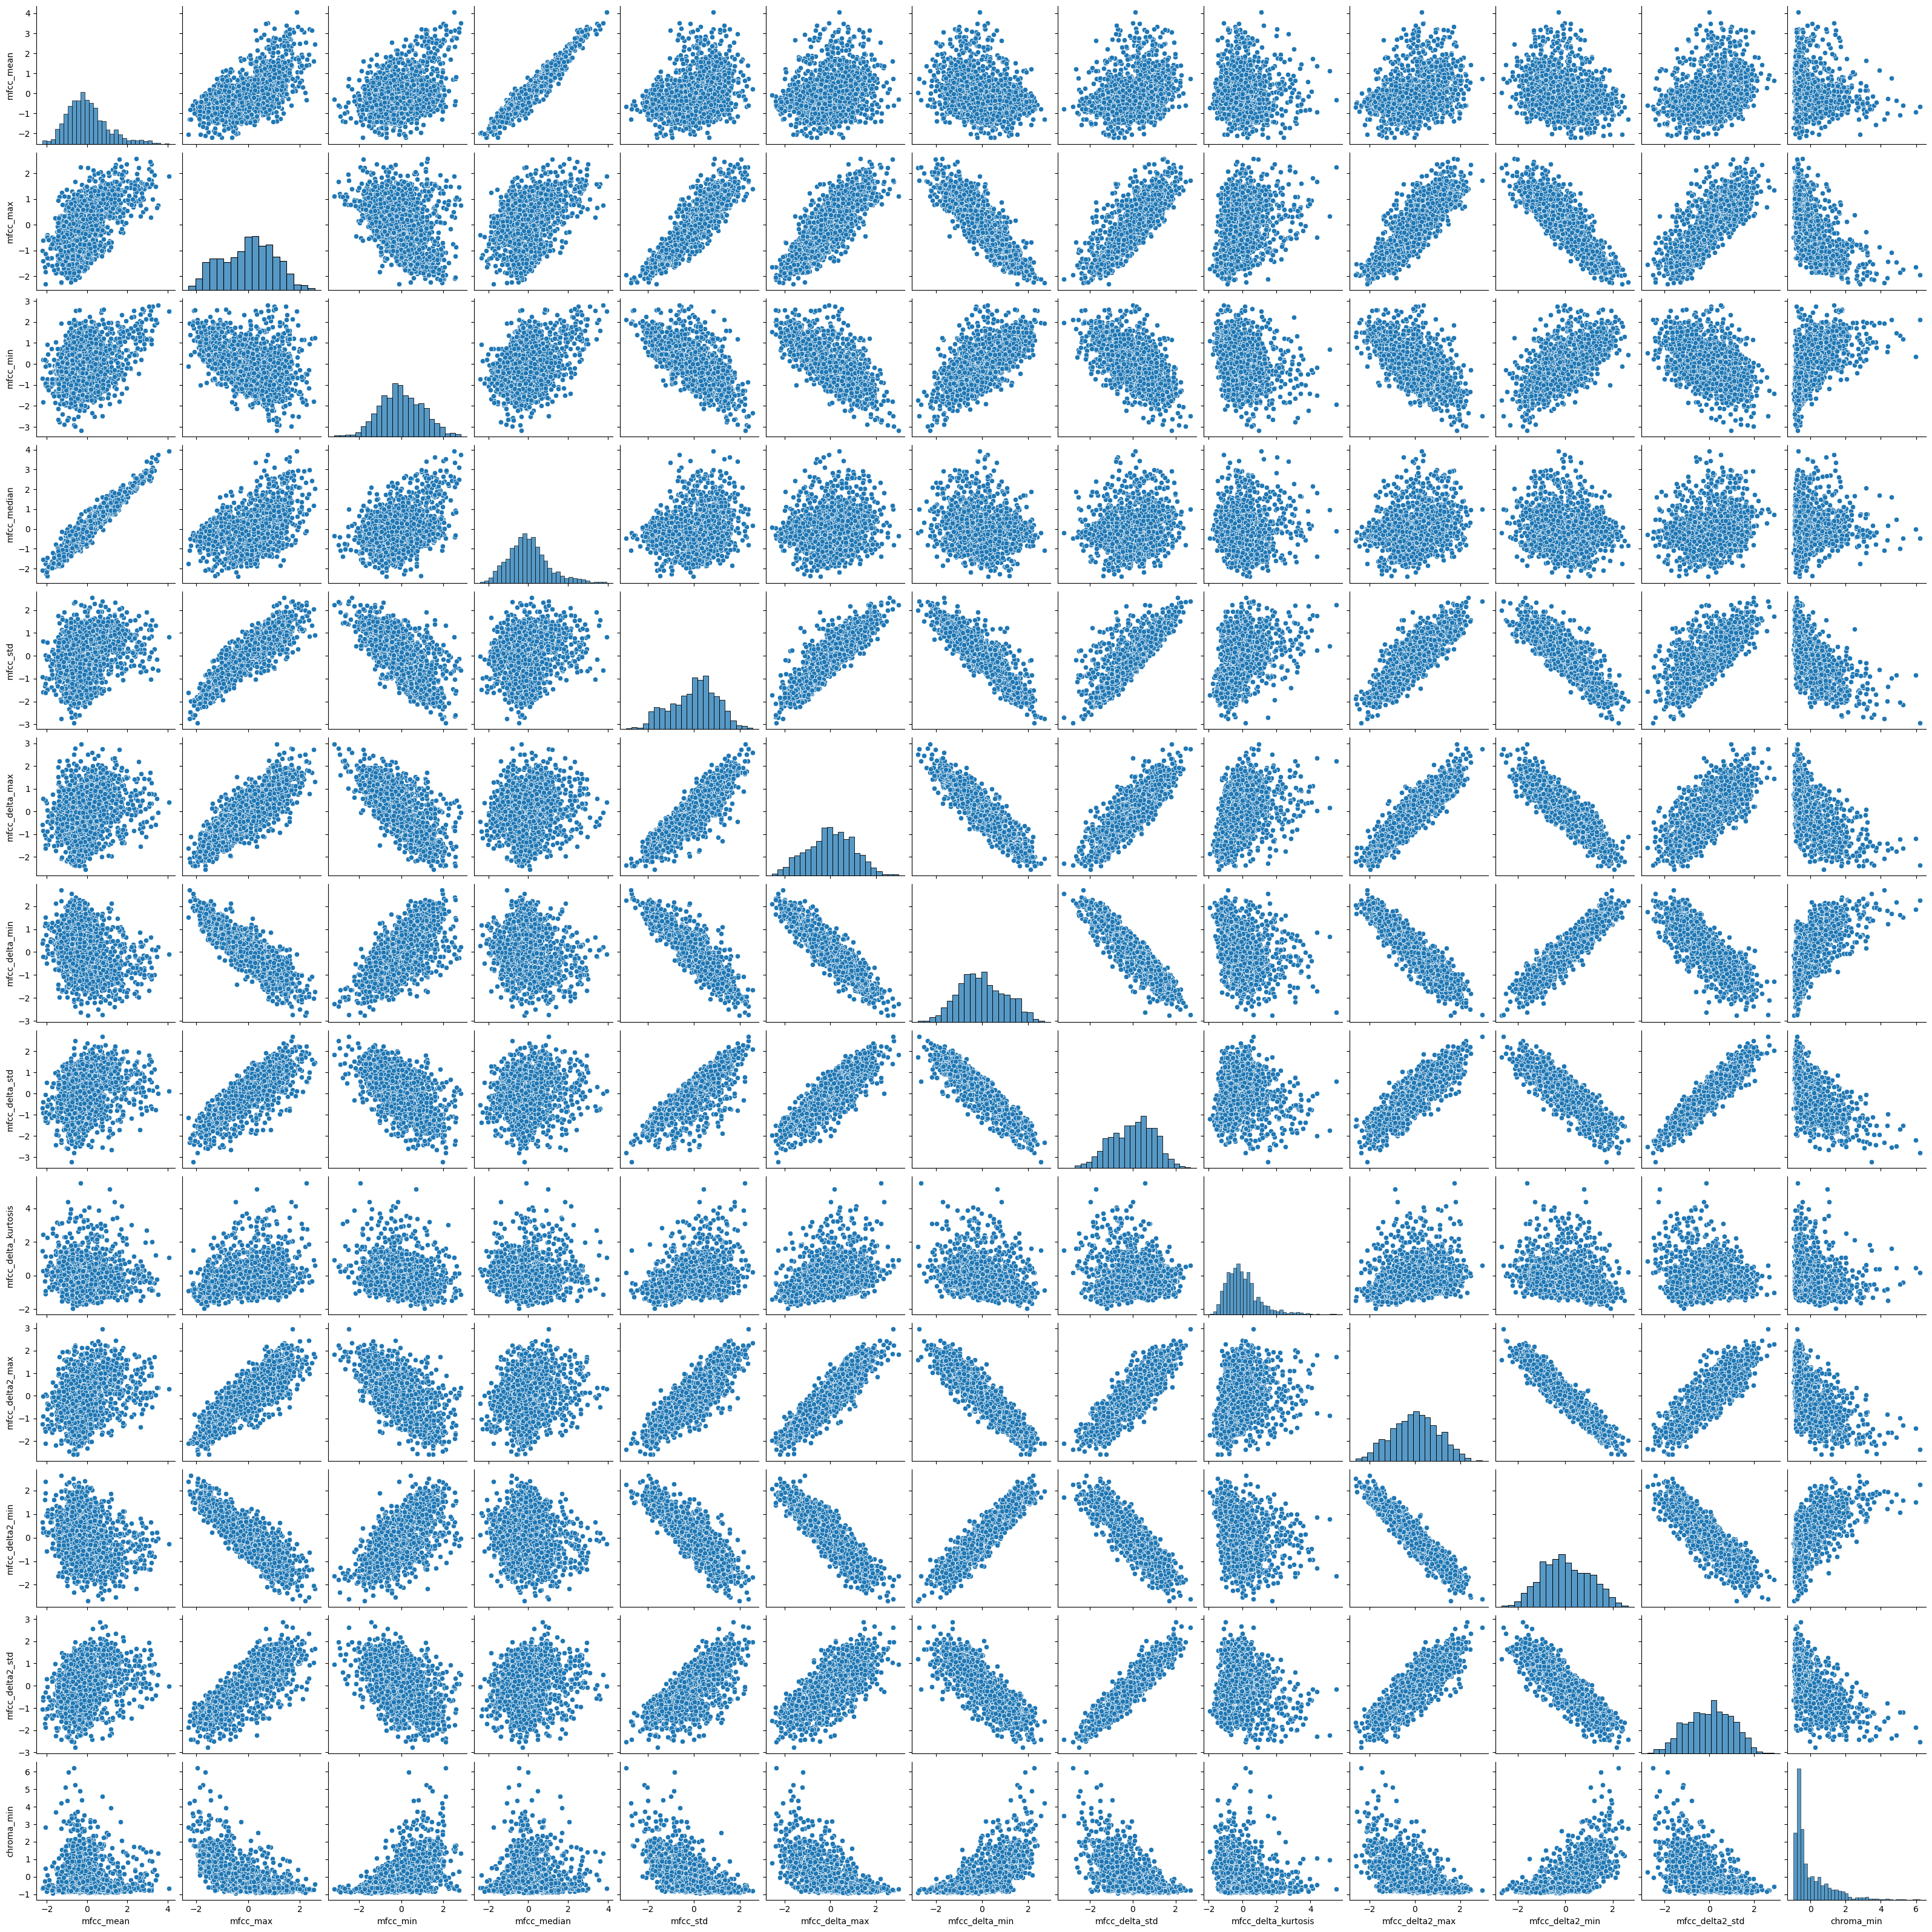

In [7]:
# Pairplot of the voice data
sns.pairplot(df.iloc[:,8:])
plt.show()

Steps for Improvement:
Hyperparameter Tuning: Adjusting the parameters of the Random Forest, like the number of trees (n_estimators), depth of the 
    trees, etc., could improve performance.
Feature Engineering: Exploring different or additional features extracted from the audio data might enhance the model's 
    ability to distinguish between emotions.

Let's proceed with evaluating the Random Forest Classifier on the test set. We'll use the same metrics as before: 
    accuracy, precision, recall, and F1-score. This will provide a comprehensive view of the model's performance.

Test Accuracy: Approximately 46.5%
Classification Report:
Precision, recall, and F1-score for each emotion class (1 to 8) are shown.
The model shows varied performance across different emotions, similar to the validation results.

Hyperparameter Tuning: Experimenting with different settings of the Random Forest parameters might enhance performance.
Feature Engineering: Exploring additional audio features or different methods of feature extraction could provide the model with more discriminative information.
Advanced Modeling Techniques: Investigating other machine learning or deep learning models, especially those tailored for audio and speech analysis, could yield better results.
Data Augmentation: If applicable, increasing the size and diversity of the training data through augmentation techniques might improve the model's robustness and accuracy.

Additional features:
    
    
Mel-Frequency Cepstral Coefficients (MFCCs):

You're already using MFCCs, but you can experiment with the number of coefficients. Typically, the first 13-20 coefficients are used.
Delta and Delta-Delta (derivative and acceleration) of MFCCs can provide information about the rate of change in features.


Spectral Features:

Spectral Centroid: Indicates where the "center of mass" for a sound is located and is a measure of the brightness of a sound.

Spectral Roll-off: The frequency below which a certain percentage of the total spectral energy (e.g., 85%) is contained.

Spectral Bandwidth: The width of the band of light at one-half the peak maximum (or full width at half maximum).


Zero Crossing Rate:

The rate at which the signal changes from positive to negative or back. This feature is often used to characterize the noisiness or the tonal content of the sound.


Chroma Features:

Chroma features are a powerful tool for analyzing music, capturing harmonic and melodic characteristics. They relate to the 12 different pitch classes.


Tempo:

The speed or pace of a given piece, which could be linked with certain emotions in the context of music.


Energy and RMS:

The energy of a signal corresponds to the total magnitude of the signal.
Root Mean Square (RMS) energy is useful to identify the amount of power in an audio signal.


Harmonic and Percussive Components:

Separating the harmonic and percussive elements of audio can be useful, especially in distinguishing speech from background noise or music.


Tonnetz:

Represents the tonal centroids as a 6-dimensional vector (harmonic relations between tones in Western music).
Statistical Features:

Applying statistical functions like mean, median, variance, skewness, kurtosis, etc., to the above features, over time or frequency bins, can yield more descriptive features.

Hyperparameter tuning

Number of Trees (n_estimators): The number of trees in the forest. More trees can improve performance but also increase computational cost.

Maximum Depth of Trees (max_depth): The maximum depth of each tree. Deeper trees can model more complex patterns but may lead to overfitting.

Minimum Samples Split (min_samples_split): The minimum number of samples required to split an internal node. Higher values prevent creating nodes that model noise.

Minimum Samples Leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node. Smaller leaf size makes the model more prone to capturing noise in train data.

Maximum Features (max_features): The number of features to consider when looking for the best split. Trying different values can lead to significant model improvements.

Bootstrap (bootstrap): Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

The Randomized Search has completed, but it seems the output for the best parameters was not captured. This is typically due to the execution environment or time constraints in processing.

However, in your own setup, after running the RandomizedSearchCV, you would get the best parameters from random_search.best_params_. These parameters are the ones that the search found to be the most effective within the specified parameter grid.

Here's how you would typically proceed:

Use the Best Parameters: Apply these best parameters to the Random Forest Classifier.
Re-train the Model: Train a new Random Forest Classifier using these optimized hyperparameters.
Evaluate Performance: Evaluate the performance of this tuned model on the validation set, and if satisfactory, test it on the test set.

Model training > Logistic Regression > Random Forest Classifier > Gradient Boosting Classifier

use feature importance to help eliminate noise

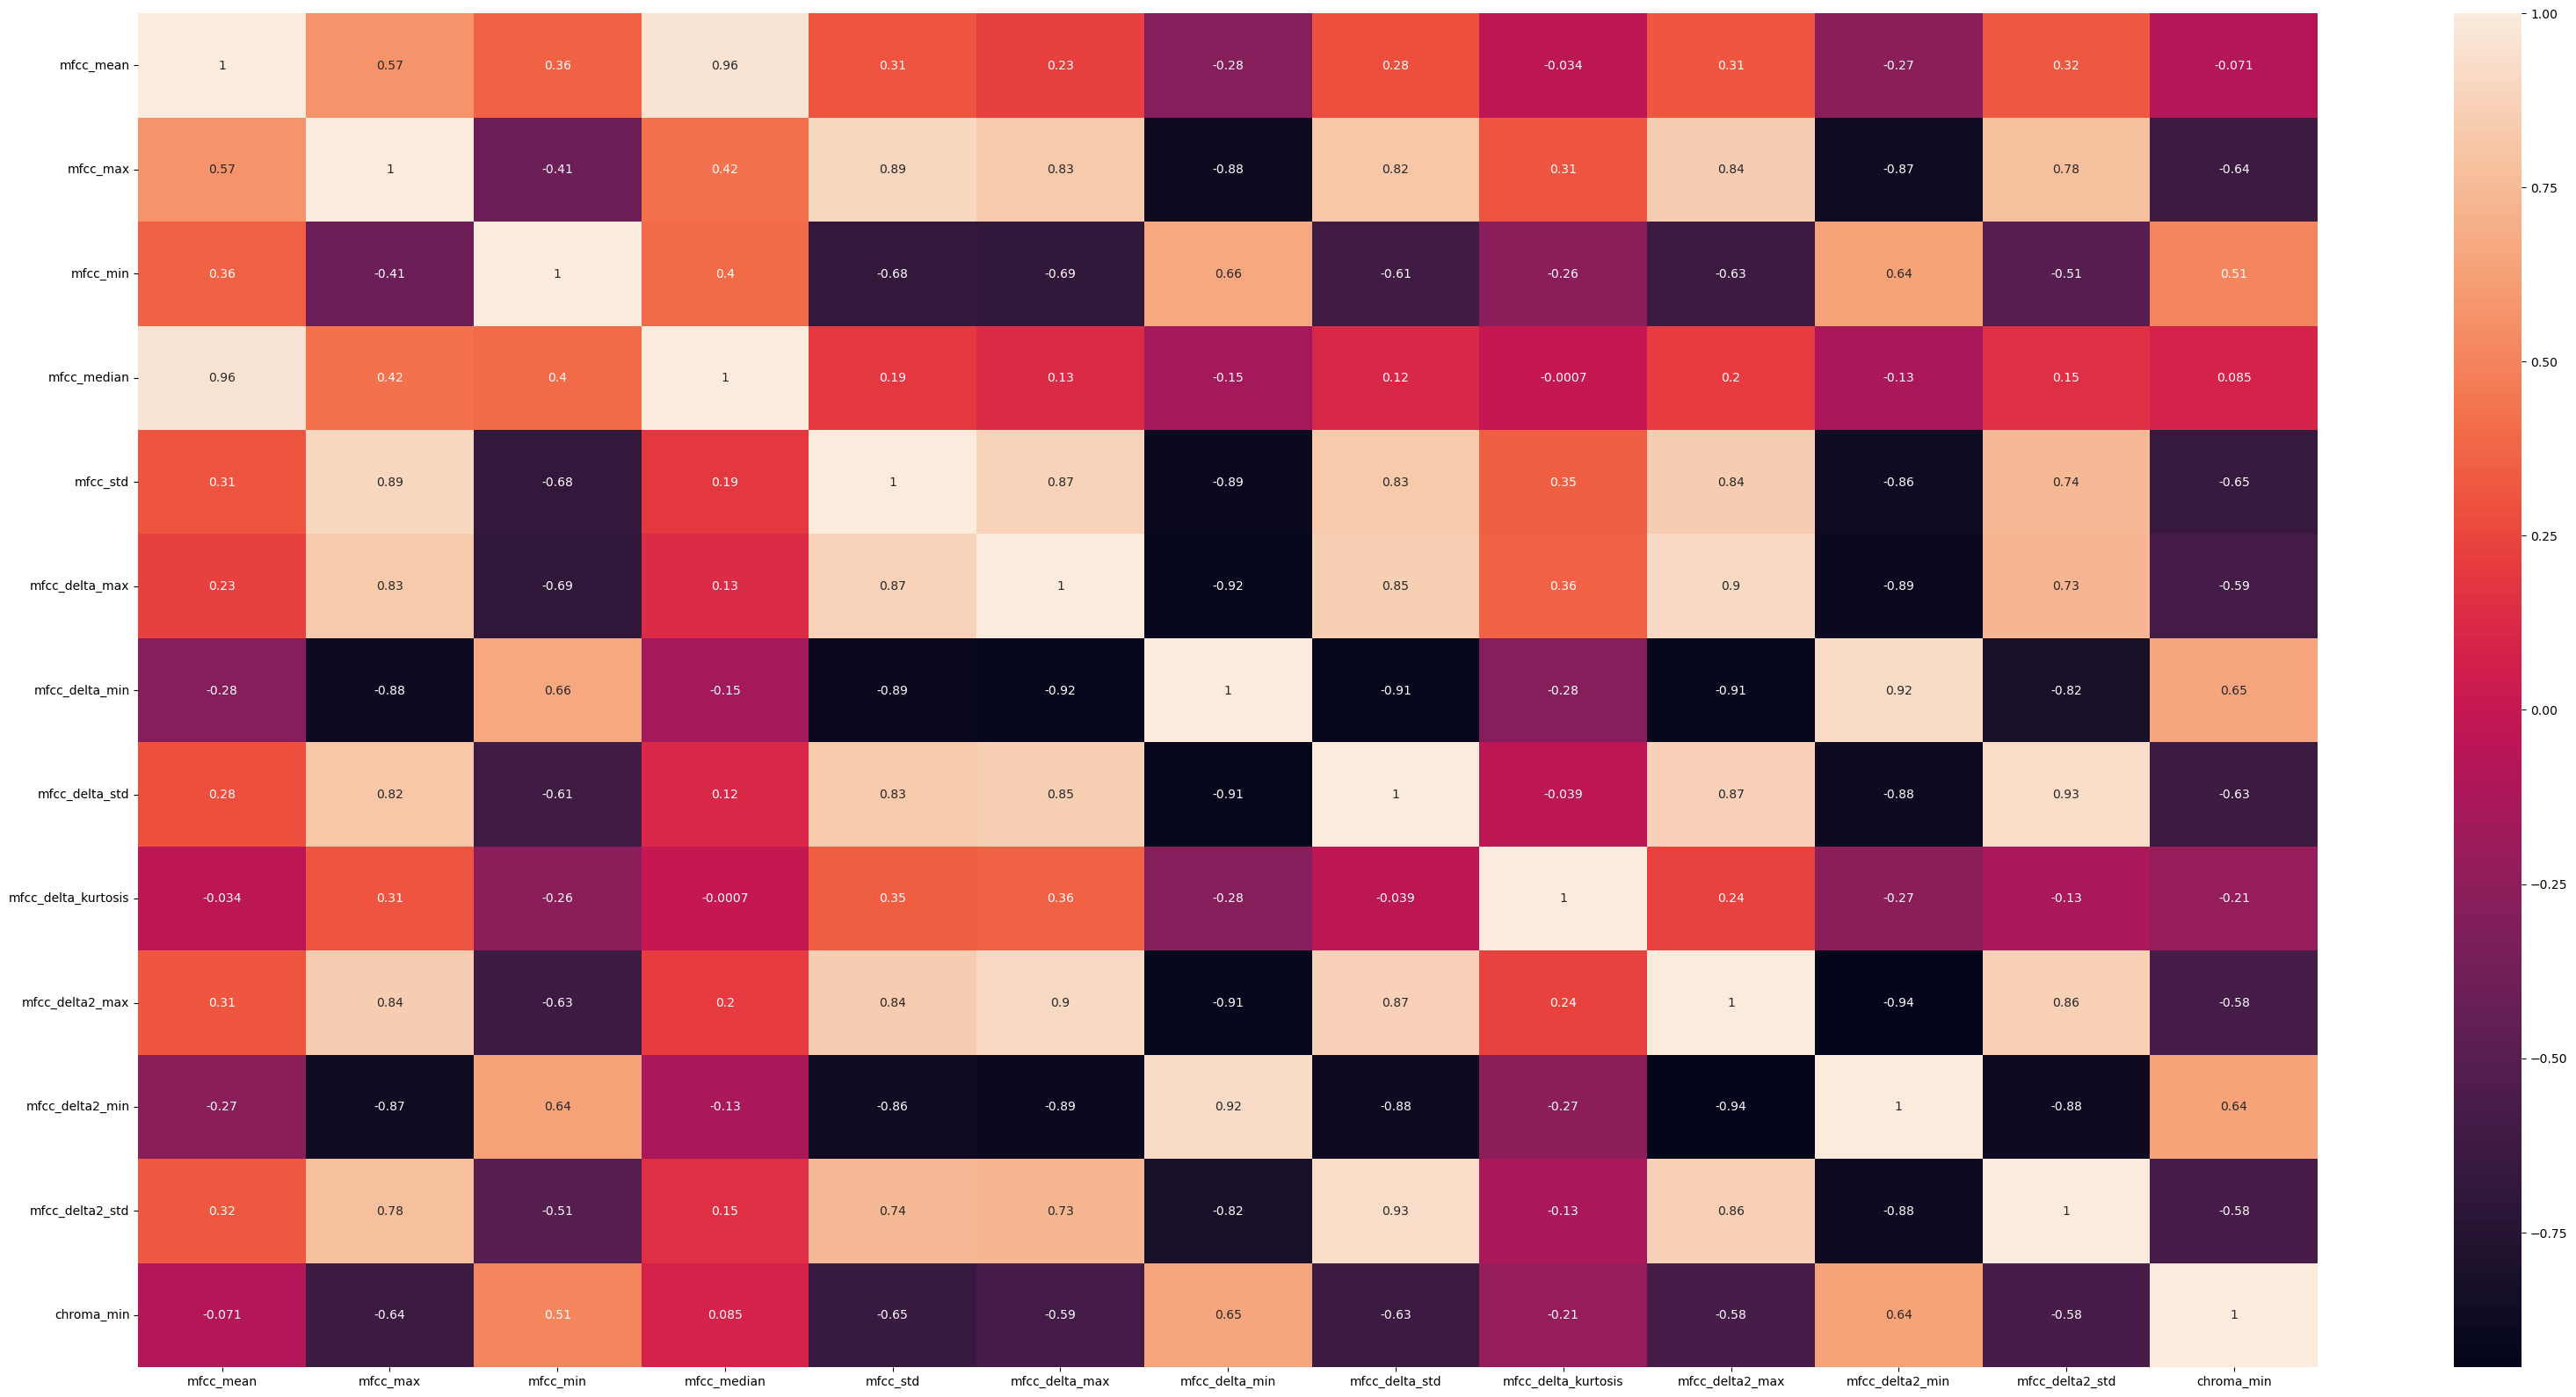

In [8]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.heatmap(df.iloc[:,8:].corr(), annot=True)
plt.show()

In [16]:
# Exporting to CSV file
df.to_csv('voice_data_eda.csv', index=False)